# Arabic Text Generation: Deep Learning for Poetry Synthesis
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJ6BQ1sJ6BgIGzMEbazHQtP5r8ISyxISoCSDbrFdOZDE6l4hKg3DogQnue0i6QhtTOl3U&usqp=CAU" alt="image" width="800"/>

## Introduction
This code is based on the paper [Arabic Text Generation: Deep Learning for Poetry Synthesis](https://www.researchgate.net/publication/349802531_Arabic_Text_Generation_Deep_Learning_for_Poetry_Synthesis). The goal is to generate new Arabic poetry using deep learning techniques, specifically focusing on **LSTM-based models** for sequence generation.

### Context
Arabic poetry is one of the oldest and most important literary traditions in the world. It has a rich history that dates back over 1,500 years, starting with pre-Islamic poetry and continuing to the modern day. Arabic poetry covers a wide range of themes, including love, nature, social issues, and philosophy. Over time, it has evolved in form and style, from the classical qasidah (odes) to modern free verse. Poets have used their words to express emotions, reflect on society, and even inspire political change. Arabic poetry continues to be an integral part of Arab culture and plays a significant role in both historical and contemporary life.


### Content
The dataset used in this project contains over **58,000 Arabic poems** spanning from the 6th century to the present day. The poems were scraped from **adab.com**, and along with the poems, metadata such as the poet's name, the poem itself, and its category are included.

You can access the dataset from Kaggle [here](https://www.kaggle.com/datasets/fahd09/arabic-poetry-dataset-478-2017/data).





In [72]:
import pandas as pd
import re

# Load Dataset
file_path = '/content/all_poems.csv'
data = pd.read_csv(file_path)

In [73]:
data.head(1)

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


In [74]:
# Display dataset information
data.info()
print("\nSample data:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58021 non-null  int64 
 1   poem_link   58021 non-null  object
 2   poem_style  58021 non-null  object
 3   poem_text   58020 non-null  object
 4   poem_title  58021 non-null  object
 5   poet_cat    58021 non-null  object
 6   poet_id     58021 non-null  int64 
 7   poet_link   58021 non-null  object
 8   poet_name   58021 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.0+ MB

Sample data:
    poem_id                                          poem_link poem_style  \
0       21  http://www.adab.com/modules.php?name=Sh3er&doW...       فصحى   
1    65546  http://www.adab.com/modules.php?name=Sh3er&doW...       فصحى   
2    65561  http://www.adab.com/modules.php?name=Sh3er&doW...       فصحى   
3    65554  http://www.adab.com/modules.php?name=Sh3er&doW...       فصحى   
4    65

In [75]:
data['poem_text'][0]

'عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي عنهما القمر عيناك حين تبسمان تورق الكروم وترقص الاضواء كالاقمار في نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض في غوريهما النجوم وتغرقان في ضباب من اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء فيه وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف من القمر كان اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب في المطر وكركر الاطفال في عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم ما تزال تسح ما تسح من دموعها الثقال كان طفلا بات يهذي قبل ان ينام بان امه – التي افاق منذ عام فلم يجدها ثم حين لج في السءال قالوا له "بعد غد تعود " لا بد ان تعود وان تهامس الرفاق انها هناك في جانب التل تنام نومة الحود تسف من ترابها وتشرب المطر كان صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء حيث يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد فيه بالضياع بلا انتهاء – كالدم المراق كالجياع كالحب كالاطف

In [76]:
data.isnull().sum()

,0
poem_id,0
poem_link,0
poem_style,0
poem_text,1
poem_title,0
poet_cat,0
poet_id,0
poet_link,0
poet_name,0


In [77]:
data= data.dropna()

In [78]:
data.isnull().sum()

,0
poem_id,0
poem_link,0
poem_style,0
poem_text,0
poem_title,0
poet_cat,0
poet_id,0
poet_link,0
poet_name,0


In [79]:
data.duplicated().sum()

0

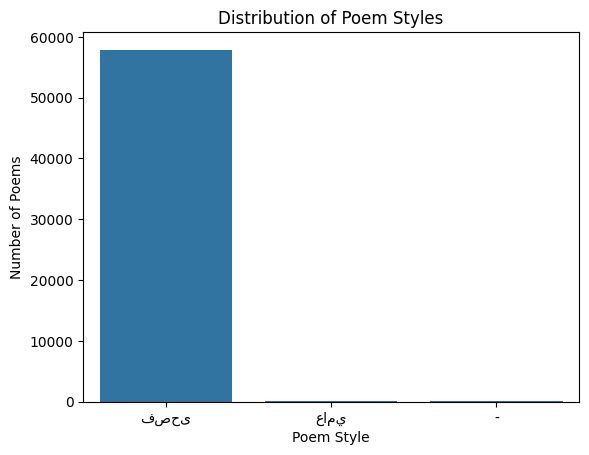

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of poems per style
style_counts = data['poem_style'].value_counts()
sns.barplot(x=style_counts.index, y=style_counts.values)
plt.title('Distribution of Poem Styles')
plt.xlabel('Poem Style')
plt.ylabel('Number of Poems')
plt.show()

<ipython-input-81-fdedaa0e5e68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_poets.index, y=top_poets.values, palette='plasma')


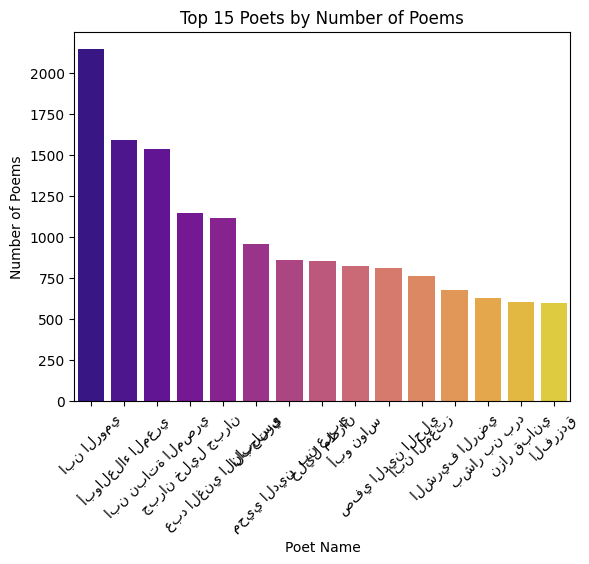

In [81]:
# Count the number of poems per poet
poet_counts = data['poet_name'].value_counts()
top_poets = poet_counts.head(15)
# Plot the top poets
sns.barplot(x=top_poets.index, y=top_poets.values, palette='plasma')
plt.title('Top 15 Poets by Number of Poems')
plt.xlabel('Poet Name')
plt.ylabel('Number of Poems')
plt.xticks(rotation=45)
plt.show()

<ipython-input-82-54aa6ebfc3f2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_poets.index, y=top_poets.values, palette='plasma')


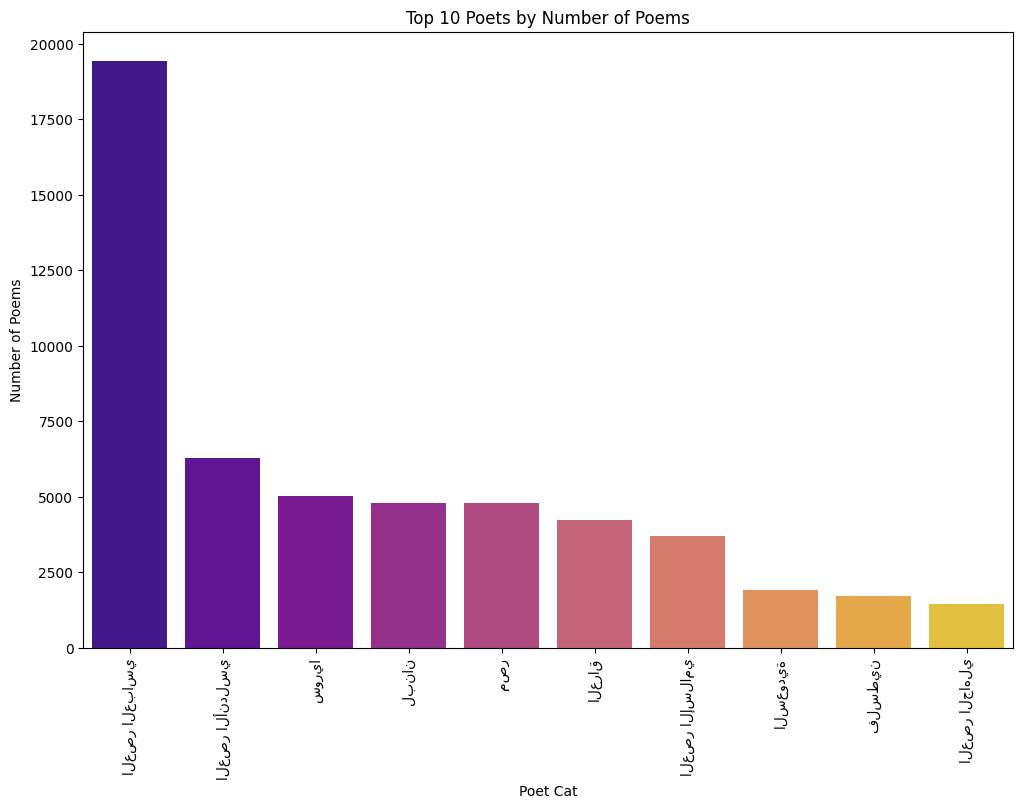

In [82]:
# Count the number of poems per poet
poet_counts = data['poet_cat'].value_counts()
top_poets = poet_counts.head(10)

# Plot the top poets
plt.figure(figsize=(12, 8))
sns.barplot(x=top_poets.index, y=top_poets.values, palette='plasma')
plt.title('Top 10 Poets by Number of Poems')
plt.xlabel('Poet Cat')
plt.ylabel('Number of Poems')
plt.xticks(rotation=90)
plt.show()

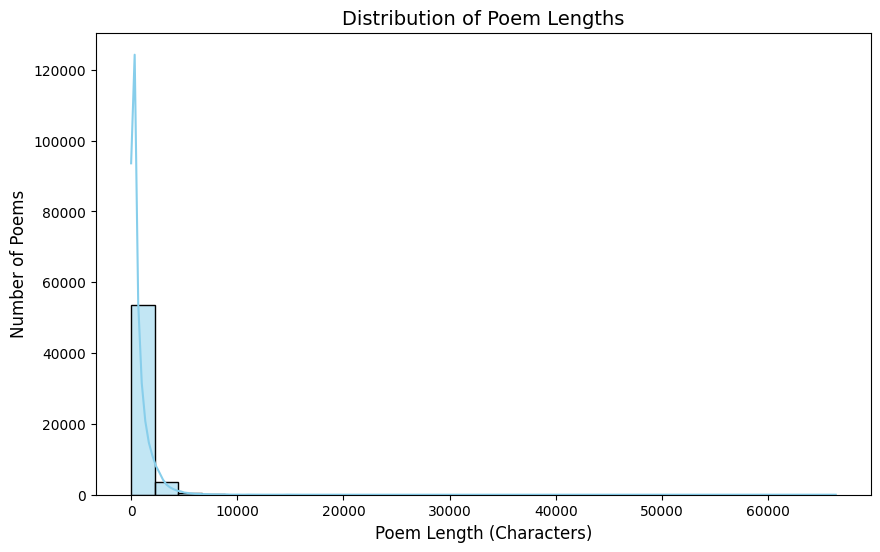

In [83]:
#  Poem Length Distribution
plt.figure(figsize=(10, 6))
data['poem_length'] = data['poem_text'].str.len()
sns.histplot(data['poem_length'], kde=True, bins=30, color='skyblue') #Added KDE and changed color
plt.title('Distribution of Poem Lengths', fontsize=14)
plt.xlabel('Poem Length (Characters)', fontsize=12)
plt.ylabel('Number of Poems', fontsize=12)
plt.show()


In [84]:
# Preprocessing
def preprocess_text(text, vocabulary):
    """
    Preprocess text by removing diacritics, punctuation, non-Arabic characters, and normalizing.
    Replace out-of-vocabulary words with <UNK>.
    """
    # Remove Arabic diacritics
    arabic_diacritics = re.compile("[\u064B-\u0652]")
    text = re.sub(arabic_diacritics, "", text)

    # Normalize Arabic letters
    text = text.replace("\u0649", "\u064A").replace("\u0629", "\u0647")

    # Remove non-Arabic characters and punctuation
    text = re.sub(r"[^\u0621-\u064A\s]", "", text)

    # Replace numbers with <NUM> tag
    text = re.sub(r"\d+", "<NUM>", text)

    # Replace concatenated "و" (Waw)
    text = re.sub(r"(\bو)([\u0621-\u064A]+)", r"\1 \2", text)

    # Replace out-of-vocabulary words with <UNK>
    text = " ".join([word if word in vocabulary else "<UNK>" for word in text.split()])

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [85]:
# Build a vocabulary (example: using most frequent words from the dataset)
all_words = " ".join(data['poem_text'].dropna()).split()
word_freq = pd.Series(all_words).value_counts()
vocabulary = set(word_freq[word_freq > 5].index)  # Keep words with frequency > 5

print("\nVocabulary size:", len(vocabulary))


Vocabulary size: 116462


In [86]:
# Apply preprocessing to the "poem_text" column
data['cleaned_text'] = data['poem_text'].apply(lambda x: preprocess_text(x, vocabulary) if pd.notnull(x) else "")

# Display a few samples of preprocessed text
print("\nPreprocessed text samples:\n", data[['poem_text', 'cleaned_text']].head())


Preprocessed text samples:
                                            poem_text  \
0  عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...   
1   انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...   
2   علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...   
3  اساطير من حشرجات الزمان نسيج اليد البالية رواه...   
4  والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...   

                                        cleaned_text  
0  عيناك <UNK> نخيل ساعه السحر او <UNK> راح يناي ...  
1  انا لا ازال و في يدي قدحي ياليل اين تفرق الشرب...  
2  علي مقلتيك ارتشفت النجوم و عانقت امالي <UNK> و...  
3  اساطير من حشرجات الزمان نسيج اليد الباليه رواه...  
4  و التف حولك <UNK> و مال جيدك في اشتهاء <UNK> ا...  


In [87]:
# Sub-dataset Selection
nizar_poems = data[data['poet_name'].str.contains("نزار قباني", na=False)]
nizar_poems = nizar_poems[nizar_poems['cleaned_text'].apply(lambda x: len(set(x.split())) <= 10000)]
nizar_poems.to_csv('nizar_10000.csv', index=False)
print("\nSaved sub-dataset with", len(nizar_poems), "poems.")


Saved sub-dataset with 605 poems.


In [88]:
from gensim.models import Word2Vec
# Word Embedding
nizar_poems['tokenized_text'] = nizar_poems['cleaned_text'].apply(lambda x: x.split())

# Prepare a list of tokenized sentences for Word2Vec
sentences = nizar_poems['tokenized_text'].tolist()

# Train a Word2Vec model
print("\nTraining Word2Vec model...")
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Save the Word2Vec model
word2vec_model.save("arabic_word2vec.model")
print("Word2Vec model trained and saved.")



Training Word2Vec model...
Word2Vec model trained and saved.


In [89]:
#Finding similar words
word = "الحب"
if word in word2vec_model.wv:
    similar_words = word2vec_model.wv.most_similar(word, topn=10)
    print(f"\nWords similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
else:
    print(f"\nThe word '{word}' is not in the Word2Vec vocabulary.")


Words similar to 'الحب':
البحر: 0.9996519088745117
مع: 0.9996446371078491
اله: 0.9996368885040283
فلا: 0.9996238350868225
جميع: 0.99953693151474
اليل: 0.9995291829109192
النساء: 0.9994943141937256
نحن: 0.9994933009147644
قد: 0.9994744062423706
كانت: 0.9994655847549438


In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [91]:
# Model Setup
sequence_lengths = [1, 2, 5, 10]
models = {}

for seq_len in sequence_lengths:
    print(f"\nPreparing sequences for Model_{seq_len}...")

    # Encode sequences
    def encode_sequences(sentences, sequence_length, vocab_to_index):
        sequences, next_words = [], []
        for sentence in sentences:
            encoded = [vocab_to_index.get(word, vocab_to_index["<UNK>"]) for word in sentence]
            for i in range(len(encoded) - sequence_length):
                sequences.append(encoded[i:i + sequence_length])
                next_words.append(encoded[i + sequence_length])
        return np.array(sequences), np.array(next_words)

    vocab_to_index = {word: idx for idx, word in enumerate(vocabulary, start=1)}
    vocab_to_index["<UNK>"] = 0

    X, y = encode_sequences(sentences, seq_len, vocab_to_index)

    # Build LSTM model
    def build_lstm_model(sequence_length, vocab_size):
        model = Sequential()
        model.add(Embedding(vocab_size, 128, input_length=sequence_length)) # The Embedding layer will learn the word embeddings during training (i.e., it will assign a dense vector to each word index).
        model.add(Bidirectional(LSTM(256, activation='relu')))
        model.add(Dropout(0.6))
        model.add(Dense(vocab_size, activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    model = build_lstm_model(seq_len, len(vocab_to_index))

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    print(f"\nTraining Model_{seq_len}...")
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=64)
    model.save(f"nizar_poetry_lstm_seq_{seq_len}.h5")
    print(f"Model_{seq_len} trained and saved.")
    models[seq_len] = model

def generate_text(model, vocab_to_index, index_to_vocab, seed_text, max_words=4):
    """
    Generate text given a seed text using the trained model.
    """
    generated_words = seed_text.split()
    for _ in range(max_words):
        input_seq = [vocab_to_index.get(word, vocab_to_index["<UNK>"]) for word in generated_words[-seq_len:]]
        input_seq = np.array(input_seq).reshape(1, -1)
        predictions = model.predict(input_seq, verbose=0)
        next_word_idx = np.argmax(predictions)
        next_word = index_to_vocab.get(next_word_idx, "<UNK>")
        if next_word == "<UNK>":
            break
        generated_words.append(next_word)
    return " ".join(generated_words)
index_to_vocab = {idx: word for word, idx in vocab_to_index.items()}
seed_text = "عيناك نور الحياة"
generated_results = []

for seq_len, model in models.items():
    print(f"\nGenerating text for Model_{seq_len}...")
    generated_text = generate_text(model, vocab_to_index, index_to_vocab, seed_text, max_words=4)
    print(f"Generated text for Model_{seq_len}: {generated_text}")
    generated_results.append((f"Model_{seq_len}", generated_text))
def calculate_log_probability(text, model, vocab_to_index):
    """
    Calculate the log probability of a generated sentence.
    """
    words = text.split()
    log_prob = 0
    for i in range(1, len(words)):
        input_seq = [vocab_to_index.get(word, vocab_to_index["<UNK>"]) for word in words[:i]]
        input_seq = np.array(input_seq).reshape(1, -1)
        probs = model.predict(input_seq, verbose=0)
        next_word_idx = vocab_to_index.get(words[i], vocab_to_index["<UNK>"])
        log_prob += np.log10(probs[0][next_word_idx])
    return log_prob
for model_name, text in generated_results:
    seq_len = int(model_name.split('_')[1])
    model = models[seq_len]
    log_prob = calculate_log_probability(text, model, vocab_to_index)
    print(f"Log probability for {model_name}: {log_prob:.3f}")


Preparing sequences for Model_1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training Model_1...
1415/1415 ━━━━━━━━━━━━━━━━━━━━ 2832s 2s/step - accuracy: 0.1104 - loss: 8.9117 - val_accuracy: 0.1303 - val_loss: 7.4601


Model_1 trained and saved.

Preparing sequences for Model_2...

Training Model_2...
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2906s 2s/step - accuracy: 0.1066 - loss: 8.5681 - val_accuracy: 0.1299 - val_loss: 7.5226


Model_2 trained and saved.

Preparing sequences for Model_5...

Training Model_5...
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 2930s 2s/step - accuracy: 0.0993 - loss: 8.3755 - val_accuracy: 0.1202 - val_loss: 7.5690


Model_5 trained and saved.

Preparing sequences for Model_10...

Training Model_10...
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 2906s 2s/step - accuracy: 0.0993 - loss: 8.3834 - val_accuracy: 0.1210 - val_loss: 7.5444


Model_10 trained and saved.

Generating text for Model_1...
Generated text for Model_1: عيناك نور الحياة و

Generating text for Model_2...
Generated text for Model_2: عيناك نور الحياة و

Generating text for Model_5...
Generated text for Model_5: عيناك نور الحياة و

Generating text for Model_10...


Generated text for Model_10: عيناك نور الحياة و
Log probability for Model_1: -13.706
Log probability for Model_2: -10.142
Log probability for Model_5: -11.798
Log probability for Model_10: -12.540


In [128]:
from keras.models import load_model

def generate_text(model, vocab_to_index, index_to_vocab, seed_text, max_words=6):
    """
    Generate text given a seed text using the trained model with temperature sampling.
    """
    generated_words = seed_text.split()
    for _ in range(max_words):
        input_seq = [vocab_to_index.get(word, vocab_to_index["<UNK>"]) for word in generated_words[-sequence_length:]]
        input_seq = np.array(input_seq).reshape(1, -1)
        predictions = model.predict(input_seq, verbose=0)[0]
        predictions = softmax(predictions)
        next_word_idx = np.random.choice(len(predictions), p=predictions)
        next_word = index_to_vocab.get(next_word_idx, "<UNK>")
        if next_word == "<UNK>":
            break
        generated_words.append(next_word)
    return " ".join(generated_words)

# Load pre-trained models
sequence_lengths = [1, 2, 5, 10]
models = {}
for seq_len in sequence_lengths:
    model_path = f"nizar_poetry_lstm_seq_{seq_len}.h5"
    print(f"Loading model from {model_path}...")
    models[seq_len] = load_model(model_path)

# Generate text for each model
index_to_vocab = {idx: word for word, idx in vocab_to_index.items()}
seed_text = "عينيك"
generated_results = []

for seq_len, model in models.items():
    print(f"\nGenerating text for Model_{seq_len}...")
    generated_text = generate_text(model, vocab_to_index, index_to_vocab, seed_text, max_words=6)
    print(f"Generated text for Model_{seq_len}: {generated_text}")
    generated_results.append((f"Model_{seq_len}", generated_text))

# Evaluation and Log Probabilities
def calculate_log_probability(text, model, vocab_to_index):
    """
    Calculate the log probability of a generated sentence.
    """
    words = text.split()
    log_prob = 0
    for i in range(1, len(words)):
        input_seq = [vocab_to_index.get(word, vocab_to_index["<UNK>"]) for word in words[:i]]
        input_seq = np.array(input_seq).reshape(1, -1)
        probs = model.predict(input_seq, verbose=0)
        next_word_idx = vocab_to_index.get(words[i], vocab_to_index["<UNK>"])
        log_prob += np.log10(probs[0][next_word_idx])
    return log_prob

# Log probability calculation
for model_name, text in generated_results:
    seq_len = int(model_name.split('_')[1])
    model = models[seq_len]
    log_prob = calculate_log_probability(text, model, vocab_to_index)
    print(f"Log probability for {model_name}: {log_prob:.3f}")

Loading model from nizar_poetry_lstm_seq_1.h5...


Loading model from nizar_poetry_lstm_seq_2.h5...


Loading model from nizar_poetry_lstm_seq_5.h5...


Loading model from nizar_poetry_lstm_seq_10.h5...



Generating text for Model_1...
Generated text for Model_1: عينيك السبات كمنجات تلمح يغضبه وعاثوا شيرين

Generating text for Model_2...
Generated text for Model_2: عينيك باعناق والفداء خراءب لكفر قتلاها صادم

Generating text for Model_5...
Generated text for Model_5: عينيك ومناي تهربين واملا مقتبس بمشيب يطلبه

Generating text for Model_10...
Generated text for Model_10: عينيك راعفا المءنث اوجهم اجواء رغيبة وتنقل
Log probability for Model_1: -64.103
Log probability for Model_2: -74.213
Log probability for Model_5: -33.622
Log probability for Model_10: -31.395


# enhancements

#temperature sampling, allowing for more diverse and creative text predictions.

Adjust Temperature:

- A lower temperature (e.g., 0.5) generates safer, more predictable text.
- A higher temperature (e.g., 1.0) introduces more creativity.

In [129]:
from keras.models import load_model

# Text Generation with Temperature Sampling
def softmax(x, temperature=1.0):
    x = np.array(x)
    x = x / temperature
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def generate_text(model, vocab_to_index, index_to_vocab, seed_text, max_words=6, temperature=0.7):
    """
    Generate text given a seed text using the trained model with temperature sampling.
    """
    generated_words = seed_text.split()
    for _ in range(max_words):
        input_seq = [vocab_to_index.get(word, vocab_to_index["<UNK>"]) for word in generated_words[-sequence_length:]]
        input_seq = np.array(input_seq).reshape(1, -1)
        predictions = model.predict(input_seq, verbose=0)[0]
        predictions = softmax(predictions, temperature)
        next_word_idx = np.random.choice(len(predictions), p=predictions)
        next_word = index_to_vocab.get(next_word_idx, "<UNK>")
        if next_word == "<UNK>":
            break
        generated_words.append(next_word)
    return " ".join(generated_words)

# Load pre-trained models
sequence_lengths = [1, 2, 5, 10]
models = {}
for seq_len in sequence_lengths:
    model_path = f"nizar_poetry_lstm_seq_{seq_len}.h5"
    print(f"Loading model from {model_path}...")
    models[seq_len] = load_model(model_path)

# Generate text for each model
index_to_vocab = {idx: word for word, idx in vocab_to_index.items()}
seed_text = "عينيك"
generated_results = []

for seq_len, model in models.items():
    print(f"\nGenerating text for Model_{seq_len}...")
    generated_text = generate_text(model, vocab_to_index, index_to_vocab, seed_text, max_words=6, temperature=0.7)
    print(f"Generated text for Model_{seq_len}: {generated_text}")
    generated_results.append((f"Model_{seq_len}", generated_text))

# Evaluation and Log Probabilities
def calculate_log_probability(text, model, vocab_to_index):
    """
    Calculate the log probability of a generated sentence.
    """
    words = text.split()
    log_prob = 0
    for i in range(1, len(words)):
        input_seq = [vocab_to_index.get(word, vocab_to_index["<UNK>"]) for word in words[:i]]
        input_seq = np.array(input_seq).reshape(1, -1)
        probs = model.predict(input_seq, verbose=0)
        next_word_idx = vocab_to_index.get(words[i], vocab_to_index["<UNK>"])
        log_prob += np.log10(probs[0][next_word_idx])
    return log_prob

# Log probability calculation
for model_name, text in generated_results:
    seq_len = int(model_name.split('_')[1])
    model = models[seq_len]
    log_prob = calculate_log_probability(text, model, vocab_to_index)
    print(f"Log probability for {model_name}: {log_prob:.3f}")

Loading model from nizar_poetry_lstm_seq_1.h5...


Loading model from nizar_poetry_lstm_seq_2.h5...


Loading model from nizar_poetry_lstm_seq_5.h5...


Loading model from nizar_poetry_lstm_seq_10.h5...



Generating text for Model_1...
Generated text for Model_1: عينيك بظلالها موفورا لرضاك البنت ياءسة شقيقتي

Generating text for Model_2...
Generated text for Model_2: عينيك عواقبه فطيما لغرة تسام مجوس واحساسي

Generating text for Model_5...
Generated text for Model_5: عينيك صك شهاده معشوق وياكل نزلتم مكارمهم

Generating text for Model_10...
Generated text for Model_10: عينيك بحاجته طهية فقاعة مخلوق يدنون وصالكم
Log probability for Model_1: -63.715
Log probability for Model_2: -70.662
Log probability for Model_5: -32.584
Log probability for Model_10: -31.398


#Increase Training Epochs from 1 to 10 but this need 90 hours by GPU to running and we can consider using hyperparameter tuning techniques to find the best model configuration without overtraining.

- Use GridSearchCV for a more exhaustive search over a small set of hyperparameters (e.g., for parameters that are critical for the model's performance).
- Use RandomizedSearchCV for a wider and more random search over hyperparameters (e.g., for parameters where the search space is large).


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

# Function to create the LSTM model with activation as a parameter
def create_model(embedding_dim=128, lstm_units=256, dropout_rate=0.6, activation='relu'):
    model = Sequential()
    model.add(Embedding(len(vocab_to_index), embedding_dim, input_length=seq_len))
    model.add(Bidirectional(LSTM(lstm_units, activation=activation)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(vocab_to_index), activation='softmax'))  # Dense layer typically uses softmax for classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model into a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)

# Define the parameter grid for GridSearchCV (fine-tuning specific parameters)
param_grid = {
    'embedding_dim': [64, 128, 256],
    'lstm_units': [128, 256],
    'dropout_rate': [0.3, 0.5],
    'activation': ['relu', 'tanh']  # Grid search for smaller set of activation functions
}

# Define the parameter distributions for RandomizedSearchCV (more exploration with larger ranges)
param_dist = {
    'embedding_dim': np.arange(64, 512, 64),
    'lstm_units': np.arange(128, 1024, 128),
    'dropout_rate': [0.3, 0.4, 0.5, 0.6, 0.7],
    'activation': ['relu', 'tanh', 'sigmoid'],
}

# Initialize GridSearchCV and RandomizedSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=3, verbose=1)

# First, perform Grid Search on a smaller set of hyperparameters
print("\nStarting Grid Search for Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

# Display the best parameters from Grid Search
print("Best parameters from Grid Search: ", grid_search.best_params_)
best_grid_model = grid_search.best_estimator_

# Now, perform Randomized Search on a broader set of hyperparameters
print("\nStarting Randomized Search for Hyperparameter Tuning...")
random_search.fit(X_train, y_train)

# Display the best parameters from Randomized Search
print("Best parameters from Randomized Search: ", random_search.best_params_)
best_random_model = random_search.best_estimator_

# Optionally, you can save the best models
best_grid_model.model.save("best_grid_search_lstm_model.h5")
best_random_model.model.save("best_random_search_lstm_model.h5")

#we could use a GRU (Gated Recurrent Unit) instead of the LSTM layer

The GRU is used instead of an LSTM. GRUs are similar to LSTMs but use fewer parameters because they combine the forget and input gates into a single update gate. This makes GRUs faster to train and often perform similarly to LSTMs.
![image](https://th.bing.com/th/id/R.d0376dd2fe6717cac7529307f66a44c2?rik=gHr9zzcDOHtbUw&riu=http%3a%2f%2fdprogrammer.org%2fwp-content%2fuploads%2f2019%2f04%2fRNN-vs-LSTM-vs-GRU.png&ehk=ZRxIvDbkCISfNll%2bELnGpu6UkiMmzRynIJyu1BtanqI%3d&risl=&pid=ImgRaw&r=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense

# Function to create the GRU model with activation as a parameter
def create_gru_model(embedding_dim=128, gru_units=256, dropout_rate=0.6, activation='relu'):
    model = Sequential()
    model.add(Embedding(len(vocab_to_index), embedding_dim, input_length=seq_len))
    model.add(Bidirectional(GRU(gru_units, activation=activation)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(vocab_to_index), activation='softmax'))  # Dense layer typically uses softmax for classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#Increase data size to improve ARAVEC

In [131]:
from gensim.models import Word2Vec
# Word Embedding
data['tokenized_text'] = data['cleaned_text'].apply(lambda x: x.split())

# Prepare a list of tokenized sentences for Word2Vec
sentences = data['tokenized_text'].tolist()

# Train a Word2Vec model
print("\nTraining Word2Vec model...")
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Save the Word2Vec model
word2vec_model.save("arabic_word2vec-all.model")
print("Word2Vec model trained and saved.")


# Finding similar words
word = "الحب"
if word in word2vec_model.wv:
    similar_words = word2vec_model.wv.most_similar(word, topn=10)
    print(f"\nWords similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
else:
    print(f"\nThe word '{word}' is not in the Word2Vec vocabulary.")



Training Word2Vec model...
Word2Vec model trained and saved.

Words similar to 'الحب':
العشق: 0.8265653848648071
الهوي: 0.7237054705619812
لحب: 0.7121508121490479
المحبه: 0.7111994028091431
حبه: 0.6898466348648071
حبك: 0.6849278807640076
الوجد: 0.6827913522720337
قلبك: 0.671090304851532
الغرام: 0.6697653532028198
بالحب: 0.6599934697151184



When Increasing the data size to improve models by:

- Better Generalization: The model learns from more examples, making it better at handling unseen data.
- Improved Word Representations: With more data, the model gets better at understanding word meanings and relationships.
- BUT: all data requires an additional 2 weeks to run
 - Challenges: It requires more computing power and may not always provide huge improvements after a certain point.